# into
DS for DAPS

## Summarization

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import random

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
s

array([-4.99820840e-02, -6.18364242e-02, -1.10072666e-01,  1.90387000e-02,
       -3.63352604e-02,  3.78523467e-02, -1.21611925e-01,  1.03475949e-01,
        1.66892462e-01,  7.52927247e-02, -9.44062578e-02, -1.35013531e-02,
       -3.17524655e-02, -9.17169307e-02, -1.57252210e-01, -3.33773269e-02,
       -1.80946344e-02,  5.38484681e-02,  1.06691886e-01, -1.39312084e-01,
       -1.52474508e-02,  7.94400101e-02, -5.38097315e-02, -5.12731813e-02,
       -3.02571809e-02, -1.77012857e-01, -4.54728111e-02,  8.50928722e-02,
       -3.11523561e-02,  1.81737509e-02, -2.80950625e-02,  4.14726425e-02,
        3.03190187e-02, -3.49078769e-02, -7.66830545e-02, -1.53478089e-01,
       -1.14387622e-01,  3.92715480e-02, -2.47067948e-02, -9.66546680e-02,
        9.03221785e-02,  3.27074272e-02, -3.92602783e-02,  2.68446788e-02,
       -3.38581644e-02, -1.13377600e-01,  4.42551652e-02,  5.10338166e-02,
        8.30901535e-02,  1.34277597e-01, -6.97769497e-02,  1.74009762e-02,
       -4.62960036e-02,  

In [4]:
np.mean(s)

0.0006653921917133565

In [5]:
np.mean(s).round()

0.0

In [6]:
# what is wrong with round, why zero?
# np.mean(s).round()

In [7]:
np.std(s)

0.10098237207543469

## we have a data

In [8]:
random.seed(10)

salary = np.random.normal(100000, 25000, 300) #https://datasciencedegree.wisconsin.edu/data-science/data-scientist-salary/#:~:text=The%20average%20data%20scientist%20salary,to%20drive%20smart%20business%20decisions.
height = np.array([180]) # survey
values = pd.read_stata("kidiq.dta") #National Longitudinal Survey of Youth

In [9]:
print(salary[:10])

print(height)

values.head()

[ 98958.05619895 123133.08270412  99309.52693817  83122.02694352
  84496.54148203 108334.40709404  95528.48636156  89461.50110073
  64257.12110413  99059.18431888]
[180]


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


### write a sentence explaining your sample based on
1. mean

In [10]:
salary.mean()

99745.5303985326

On average Data Scientist earn around 101973 USD based

In [11]:
values.kid_score.mean()

86.79723502304148

In [12]:
height.mean()

180.0

2. media

In [13]:
np.median(salary)

98617.7457170395

In [14]:
values.kid_score.median()

90.0

3. median + std
4. IQR from scipy.stats import iqr
5. mode ??
6. something else?

### plots!
1. median

<AxesSubplot:>

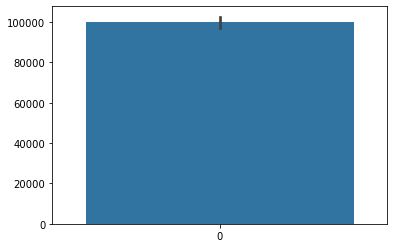

In [15]:
sns.barplot(data = salary)

<AxesSubplot:>

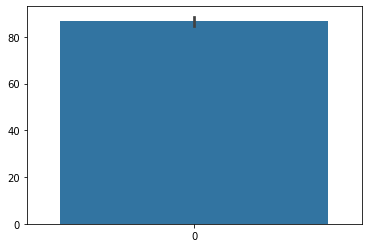

In [16]:
sns.barplot(data = values.kid_score)

2. Boxplot

<AxesSubplot:>

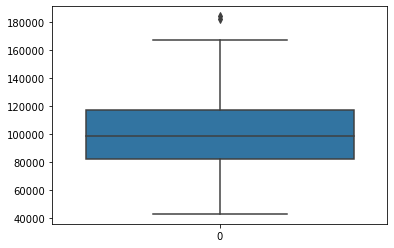

In [17]:
sns.boxplot(data = salary)

3. rainplot

In [18]:
# !pip install ptitprince

Text(0.5, 1.0, 'Figure distribution of \n Kids Scores')

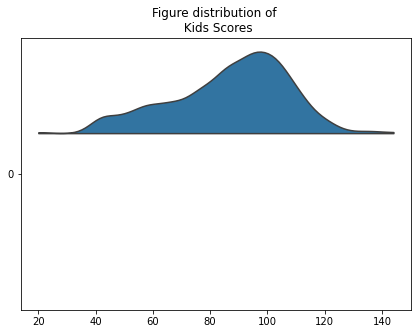

In [19]:
import os
import matplotlib.pyplot as plt
import ptitprince as pt

# plotting the clouds
f, ax = plt.subplots(figsize=(7, 5))
dy="group"; dx="score"; ort="h"; pal = sns.color_palette(n_colors=1)
ax=pt.half_violinplot( #x = dx, y = dy,
                       data = values.kid_score, palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
plt.title("Figure distribution of \n Kids Scores")

Text(0.5, 1.0, 'Figure P3\n Raincloud Without Jitter')

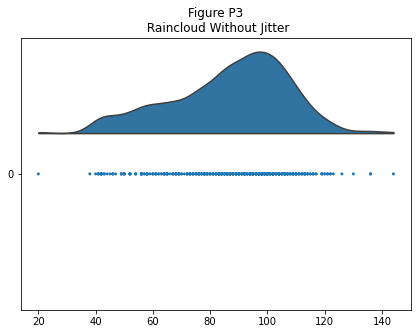

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( data = values.kid_score,palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( data = values.kid_score, palette = pal, edgecolor = "white",
                  size = 3, jitter = 0, zorder = 0, orient = ort)
plt.title("Figure P3\n Raincloud Without Jitter")

Text(0.5, 1.0, 'Figure P4\n Raincloud with Jittered Data')

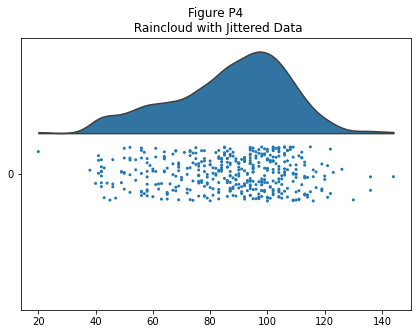

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( data = values.kid_score, palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( data = values.kid_score, palette = pal, edgecolor = "white",
                  size = 3, jitter = 1, zorder = 0, orient = ort)
plt.title("Figure P4\n Raincloud with Jittered Data")

Text(0.5, 1.0, 'Figure P5\n Raincloud with Boxplot')

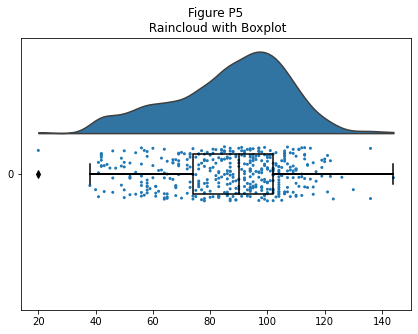

In [22]:
#adding the boxplot with quartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( data = values.kid_score, palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( data = values.kid_score, palette = pal, edgecolor = "white",
                  size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( data = values.kid_score, color = "black", width = .15, zorder = 10,
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},
                saturation = 1, orient = ort)
plt.title("Figure P5\n Raincloud with Boxplot")

### regression is my summarization

kid_score Child’s score on IQ test
mom_hs Did mom complete high school?
mom_iq Mother’s score on IQ test
mom_work Working mother?
mom_age Mother’s age at birth of child


In [23]:
values = pd.read_stata("kidiq.dta") #National Longitudinal Survey of Youth
values.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


In [24]:
values.median()

kid_score    90.000000
mom_hs        1.000000
mom_iq       97.915254
mom_work      3.000000
mom_age      23.000000
dtype: float64

<AxesSubplot:>

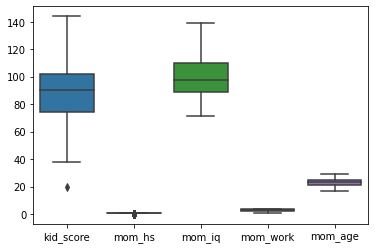

In [25]:
sns.boxplot(data = values)

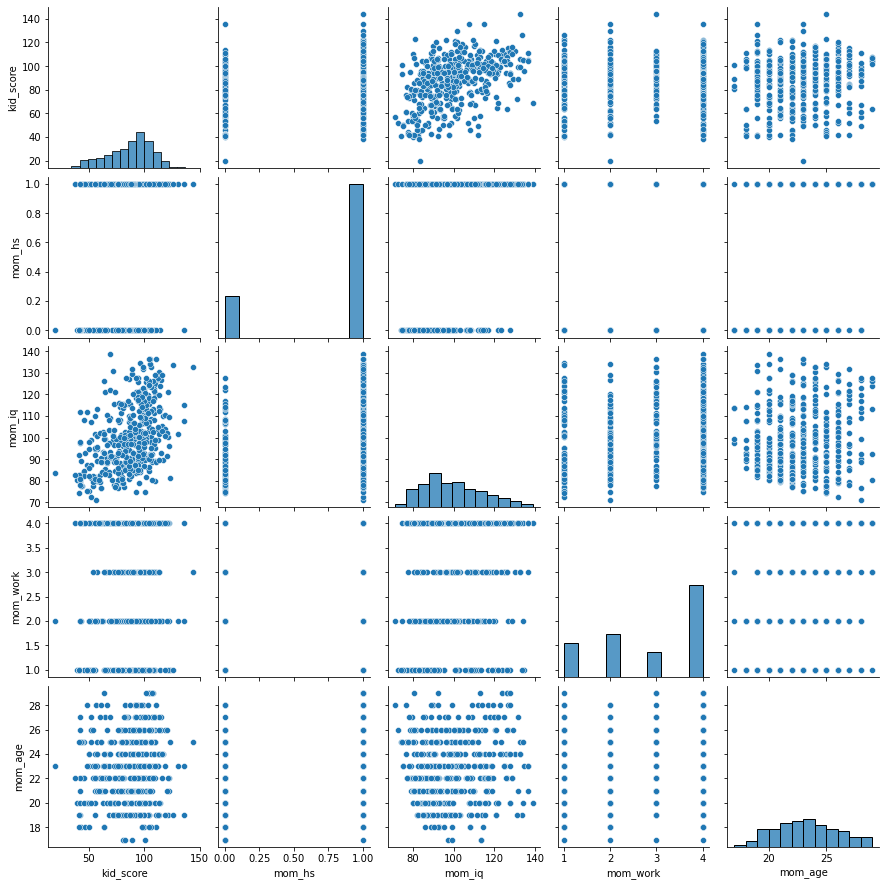

In [26]:
sns.pairplot(values)

In [27]:
from sklearn.linear_model import LinearRegression

In [52]:
values

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27
...,...,...,...,...,...
429,94,0.0,84.877412,4,21
430,76,1.0,92.990392,4,23
431,50,0.0,94.859708,2,24
432,88,1.0,96.856624,2,21


## simple

In [121]:
model = LinearRegression()

X = values['mom_iq'].values.reshape(-1, 1)
y = values.kid_score

model = model.fit(X = X, y = y)

In [122]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.20095123075855126


In [123]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 25.79977784996295
slope: [0.60997457]


In other words: kid_score ≈ 25.80 + 0.61 × mom_iq.

<AxesSubplot:ylabel='kid_score'>

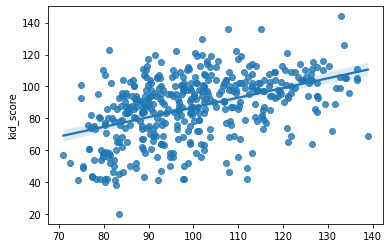

In [127]:
sns.regplot(x = X, y = y)

## Multiple

In [149]:
model = LinearRegression()

X = values.drop('kid_score', axis =1)
y = values.kid_score

model = model.fit(X = X, y = y)

In [150]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.21504503560100818


In [151]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 20.82261170327233
slope: [5.56117805 0.56208142 0.13372871 0.21985986]


In [148]:
# help(OLS)

In [152]:
from statsmodels.api import OLS

print(OLS(y, X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              kid_score   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              2481.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                   1.86e-295
Time:                        17:21:02   Log-Likelihood:                         -1874.3
No. Observations:                 434   AIC:                                      3757.
Df Residuals:                     430   BIC:                                      3773.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

https://stats.stackexchange.com/questions/197923/difference-between-centered-and-uncentered-r2#:~:text=Uncentered%20R2%20is%20a%20measure,is%20equivalent%20to%20the%20mean.
R-squared (uncentered)

In [141]:
import statsmodels.formula.api as smf

m1 = smf.ols(formula='kid_score ~ mom_iq + mom_hs + mom_work + mom_age + 1', data=values).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     29.38
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.31e-21
Time:                        17:07:55   Log-Likelihood:                -1871.7
No. Observations:                 434   AIC:                             3753.
Df Residuals:                     429   BIC:                             3774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8226      9.188      2.266      0.0

In other words: kid_score ≈ ...

In [69]:
y_pred = model.predict(X)
# Plot outputs
y_pred

array([100.93283337,  82.64385451,  97.74337895,  88.18026701,
        84.98556124,  85.56343619, 109.38513623, 102.18349924,
        77.67097432,  84.1336613 ,  81.36177996,  85.51422078,
        82.85925829,  96.77658715,  82.87503974,  99.91923927,
        96.15897421,  95.22532314, 106.55006563,  79.63215304,
        93.41913089, 103.59680623,  86.08273017,  88.14187494,
        80.39120468, 101.2872172 ,  86.90649332,  86.79196678,
        77.09593538,  95.73848882,  93.79835457,  88.937569  ,
        99.02718554,  86.98785634,  86.97813548,  83.95689618,
        86.75748037,  92.56660162,  80.36625563,  82.64385451,
        88.89906757, 105.22598628,  78.5074101 , 102.47784209,
        75.52616111, 104.18936286,  76.05432345,  95.18274914,
        94.24909807,  88.95085837,  89.49936927, 102.92540761,
        85.51422078,  85.07956579,  88.80384029,  70.4463431 ,
        85.35522931,  72.26506452,  69.27472567,  93.41083002,
        95.35905185,  94.54103926,  83.49688098,  89.37

In [114]:
output = y.to_frame()
output['pred'] = y_pred
output

,kid_score,pred
0,65,100.932833
1,98,82.643855
2,85,97.743379
3,83,88.180267
4,115,84.985561
...,...,...
429,94,73.682600
430,76,84.243653
431,50,79.685585
432,88,85.709613


<AxesSubplot:xlabel='kid_score', ylabel='pred'>

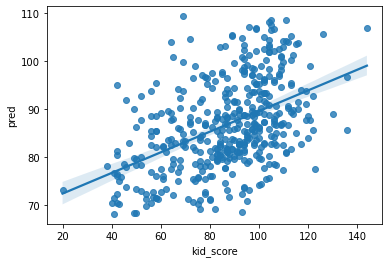

In [118]:
sns.regplot(x = 'kid_score', y = 'pred', data = output)